In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../data/mouse_drug_data.csv"
clinical_trial_data_to_load = "../data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_df = mouse_df.merge(trial_df, how='left', on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean_df = combined_df.groupby(['Drug','Timepoint']).mean()

# Convert to DataFrame
tumor_mean_df = tumor_mean_df.drop(columns='Metastatic Sites')

# Preview DataFrame
tumor_mean_df = tumor_mean_df.reset_index()
tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sems_df = combined_df.groupby(['Drug','Timepoint']).sem()

# Convert to DataFrame
tumor_sems_df = tumor_sems_df.drop(columns=['Metastatic Sites','Mouse ID'])

# Preview DataFrame
tumor_sems_df = tumor_sems_df.reset_index()
tumor_sems_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_means_pivot_table = tumor_mean_df.pivot(index='Timepoint', columns='Drug')
tumor_means_pivot_table = tumor_means_pivot_table.reset_index()
# Preview that Reformatting worked
tumor_means_pivot_table.head()


Timepoint Tumor Volume (mm3)                                              \
Drug                    Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
0            0          45.000000  45.000000  45.000000  45.000000  45.000000   
1            5          44.266086  46.503051  47.062001  47.389175  46.796098   
2           10          43.084291  48.285125  49.403909  49.582269  48.694210   
3           15          42.064317  50.094055  51.296397  52.399974  50.933018   
4           20          40.716325  52.157049  53.197691  54.920935  53.644087   

                                                             
Drug    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
0     45.000000  45.000000  45.000000  45.000000  45.000000  
1     47.125589  47.248967  43.944859  47.527452  46.851818  
2     49.423329  49.101541  42.531957  49.463844  48.689881  
3     51.359742  51.067318  41.495061  51.529409  50.779059  
4     54.364417  53.346737  40.238325  54.067395  53.170334

In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_sems_pivot_table = tumor_sems_df.pivot(index='Timepoint', columns='Drug')

# Preview that Reformatting worked
tumor_sems_pivot_table.head()

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182

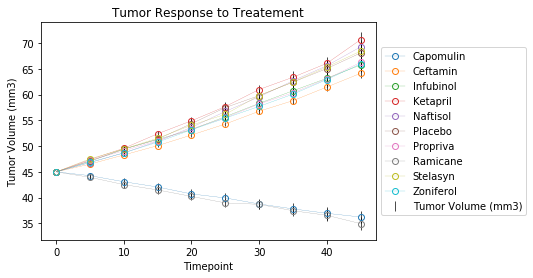

In [15]:
# Generate the Plot (with Error Bars)
tumor_means_pivot_table.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)',
                    linewidth=.2, marker='o', markerfacecolor='none')
plt.errorbar(x=tumor_mean_df['Timepoint'],y=tumor_mean_df['Tumor Volume (mm3)'], yerr=tumor_sems_df['Tumor Volume (mm3)'], fmt='none',elinewidth=1, color='black',alpha=.7)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Tumor Response to Treatement')
plt.ylabel('Tumor Volume (mm3)')
# Save the Figure
plt.show()

In [9]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [17]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean_df = combined_df.groupby(['Drug','Timepoint']).mean()

# Convert to DataFrame
metastatic_mean_df = metastatic_mean_df.drop(columns='Tumor Volume (mm3)')

# Preview DataFrame
metastatic_mean_df = metastatic_mean_df.reset_index()
metastatic_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [18]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sems = combined_df.groupby(['Drug','Timepoint']).sem()

# Convert to DataFrame
metastatic_sems = metastatic_sems.drop(columns = ['Mouse ID', 'Tumor Volume (mm3)'])
metastatic_sems = metastatic_sems.reset_index()

# Preview DataFrame
metastatic_sems.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [19]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mean_pivot = metastatic_mean_df.pivot(index = 'Timepoint', columns = 'Drug')
metastatic_mean_pivot = metastatic_mean_pivot.reset_index()
# Preview that Reformatting worked
metastatic_mean_pivot.head()   

Timepoint Metastatic Sites                                          \
Drug                  Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
0            0         0.000000  0.000000  0.000000  0.000000  0.000000   
1            5         0.160000  0.380952  0.280000  0.304348  0.260870   
2           10         0.320000  0.600000  0.666667  0.590909  0.523810   
3           15         0.375000  0.789474  0.904762  0.842105  0.857143   
4           20         0.652174  1.111111  1.050000  1.210526  1.150000   

                                                        
Drug   Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.375000  0.320000  0.120000  0.240000  0.166667  
2     0.833333  0.565217  0.250000  0.478261  0.500000  
3     1.250000  0.764706  0.333333  0.782609  0.809524  
4     1.526316  1.000000  0.347826  0.952381  1.294118

In [20]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_sem_pivot = metastatic_sems.pivot(index = 'Timepoint', columns = 'Drug')
# Preview that Reformatting worked
metastatic_sem_pivot.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

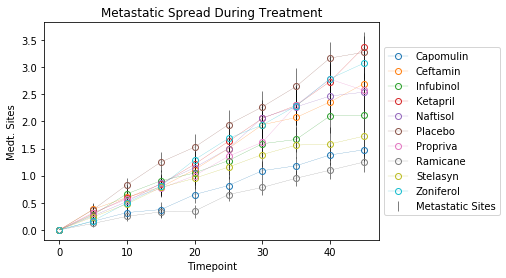

In [21]:
# Generate the Plot (with Error Bars)
metastatic_mean_pivot.plot(kind='line', x='Timepoint', y='Metastatic Sites',
                    linewidth=.2, marker='o', markerfacecolor='none')
plt.errorbar(x=metastatic_mean_df['Timepoint'],y=metastatic_mean_df['Metastatic Sites'], yerr=metastatic_sems['Metastatic Sites'], fmt='none',elinewidth=1, color='black',alpha=.5)
plt.title('Metastatic Spread During Treatment')
plt.ylabel('Medt. Sites')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [22]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count_df = combined_df.groupby(['Drug','Timepoint']).count()

# Convert to DataFrame
mouse_count_df = mouse_count_df.drop(columns=['Metastatic Sites','Tumor Volume (mm3)'])
mouse_count_df = mouse_count_df.rename(columns={'Mouse ID':'Mouse Count'})
mouse_count_df = mouse_count_df.reset_index()
# Preview DataFrame
mouse_count_df.head()


    

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [23]:
mouse_count_df['perc'] = mouse_count_df['Mouse Count']/25
# fix the drugs Propriva and Stelasyn
mouse_count_df.loc[60:69] = mouse_count_df.loc[60:69].assign(perc=lambda x: x['Mouse Count']/26)
mouse_count_df.loc[80:89] = mouse_count_df.loc[80:89].assign(perc=lambda x: x['Mouse Count']/26)

mouse_count_df['perc'] = round((mouse_count_df['perc']*100),2)
mouse_count_df.head()

mouse_count_perc = mouse_count_df
mouse_count_perc = mouse_count_perc.drop(columns='Mouse Count')
mouse_count_perc.head()


,Drug,Timepoint,perc
0,Capomulin,0,100.0
1,Capomulin,5,100.0
2,Capomulin,10,100.0
3,Capomulin,15,96.0
4,Capomulin,20,92.0


In [24]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot = mouse_count_perc.pivot(index='Timepoint', columns='Drug')
mouse_count_pivot = mouse_count_pivot.reset_index()
# Preview the Data Frame
mouse_count_pivot

Timepoint      perc                                               \
Drug           Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo   
0            0     100.0    100.0     100.0    100.0    100.0   100.0   
1            5     100.0     84.0     100.0     92.0     92.0    96.0   
2           10     100.0     80.0      84.0     88.0     84.0    96.0   
3           15      96.0     76.0      84.0     76.0     84.0    80.0   
4           20      92.0     72.0      80.0     76.0     80.0    76.0   
5           25      88.0     72.0      72.0     76.0     72.0    68.0   
6           30      88.0     64.0      68.0     72.0     60.0    60.0   
7           35      88.0     56.0      48.0     68.0     60.0    56.0   
8           40      84.0     56.0      40.0     60.0     60.0    48.0   
9           45      84.0     52.0      36.0     44.0     52.0    44.0   

                                           
Drug Propriva Ramicane Stelasyn Zoniferol  
0      100.00    100.0   100.00     100.0  
1       96.15    100.0    96.15      96.0  
2       88.46     96.0    88.46      88.0  
3       65.38     96.0    88.46      84.0  
4       65.38     92.0    80.77      68.0  
5       53.85     92.0    73.08      64.0  
6       50.00     92.0    69.23      60.0  
7       38.46     84.0    61.54      56.0  
8       34.62     80.0    46.15      56.0  
9       26.92     80.0    42.31      56.0

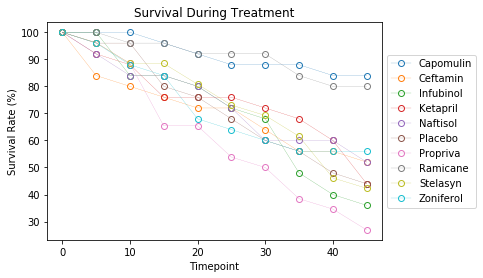

In [26]:
# Generate the Plot (Accounting for percentages)
mouse_count_pivot.plot(kind='line', x='Timepoint', y='perc',
                    linewidth=.2, marker='o', markerfacecolor='none')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Survival During Treatment')
plt.ylabel('Survival Rate (%)')
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [27]:
tumor_means_pivot_table

Timepoint Tumor Volume (mm3)                                              \
Drug                    Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
0            0          45.000000  45.000000  45.000000  45.000000  45.000000   
1            5          44.266086  46.503051  47.062001  47.389175  46.796098   
2           10          43.084291  48.285125  49.403909  49.582269  48.694210   
3           15          42.064317  50.094055  51.296397  52.399974  50.933018   
4           20          40.716325  52.157049  53.197691  54.920935  53.644087   
5           25          39.939528  54.287674  55.715252  57.678982  56.731968   
6           30          38.769339  56.769517  58.299397  60.994507  59.559509   
7           35          37.816839  58.827548  60.742461  63.371686  62.685087   
8           40          36.958001  61.467895  63.162824  66.068580  65.600754   
9           45          36.236114  64.132421  65.755562  70.662958  69.265506   

                                                             
Drug    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
0     45.000000  45.000000  45.000000  45.000000  45.000000  
1     47.125589  47.248967  43.944859  47.527452  46.851818  
2     49.423329  49.101541  42.531957  49.463844  48.689881  
3     51.359742  51.067318  41.495061  51.529409  50.779059  
4     54.364417  53.346737  40.238325  54.067395  53.170334  
5     57.482574  55.504138  38.974300  56.166123  55.432935  
6     59.809063  58.196374  38.703137  59.826738  57.713531  
7     62.420615  60.350199  37.451996  62.440699  60.089372  
8     65.052675  63.045537  36.574081  65.356386  62.916692  
9     68.084082  66.258529  34.955595  68.438310  65.960888

In [28]:
# Collect sizes for start and end tumor
start_size = tumor_means_pivot_table.iloc[0]
end_size = tumor_means_pivot_table.iloc[9]


#DATA MUNGING to get the right dataframe
percent_change = ((end_size-start_size)/start_size) * 100 
percent_change = percent_change.sort_values()
percent_change = percent_change.to_frame()
#percent_change.set_index('Drug')
percent_change = percent_change.reset_index()
percent_change = percent_change.drop(columns = 'level_0')
percent_change = percent_change.drop(percent_change.index[-1])
percent_change = percent_change.set_index('Drug')
percent_change

,0
Drug,
Ramicane,-22.320900
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Zoniferol,46.579751
Propriva,47.241175
Placebo,51.297960
Stelasyn,52.085134
Naftisol,53.923347


In [121]:
percent_change = percent_change.rename(columns={0:'% change'})
tuple(percent_change['% change'])
percent_dict


{'% change': {'Ramicane': -22.320900462766673,
  'Capomulin': -19.475302667894173,
  'Ceftamin': 42.51649185589744,
  'Infubinol': 46.12347172785187,
  'Zoniferol': 46.57975086509525,
  'Propriva': 47.24117486320637,
  'Placebo': 51.29796048315153,
  'Stelasyn': 52.085134287899024,
  'Naftisol': 53.92334713476923,
  'Ketapril': 57.028794686606076}}

<Figure size 864x576 with 0 Axes>

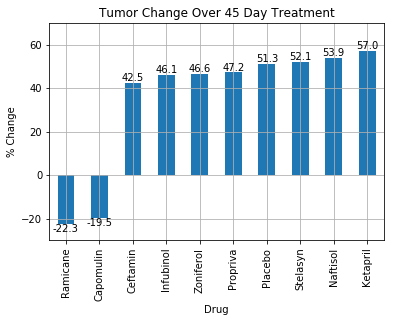

In [132]:
# Store all Relevant Percent Changes into a Tuple
vals = tuple(percent_change['% change'])
drugs = list(percent_change.index)

# Use dictionary to create colors dict
percent_dict = percent_change.to_dict()
# Create a DF to plot
bar_df = pd.DataFrame({'drug':drugs, '%':vals})
# Create your colors list
colors={}
for k,v in percent_dict.items():
    for i,j in v.items():
        if j > 0:
            colors[i] = 'r'
        else:
            colors[i] = 'g'
            
# Plot the figure.
plt.figure(figsize=(12, 8))

ax = bar_df.plot(kind='bar',legend=False) #color=[colors[i] for i in bar_df['drug']])
ax.grid()
ax.set_ylim(-30,70)
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xlabel('Drug')
ax.set_ylabel('% Change')

ax.set_xticklabels(drugs)


def add_value_labels(ax, spacing=0):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Call the function above. All the magic happens there.
add_value_labels(ax)



In [ ]:

fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [51]:
#plt.savefig("image.png")